In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from collections import defaultdict
import pandas as pd

In [2]:
data = []
with open("post_process/test.txt", "rt") as f:
    for line in f:
        data.append(line.strip().split(","))
data[:5]

[['0',
  '0',
  '1709.999616',
  '20.999520000000018',
  '266.99980800000003',
  '664.9992'],
 ['1',
  '0',
  '1712.998656',
  '18.000359999999986',
  '266.99980800000003',
  '673.99992'],
 ['2', '0', '1713.999936', '17.000279999999947', '268.000128', '671.99976'],
 ['3', '0', '1713.999936', '16.001279999999994', '268.000128', '668.99952'],
 ['4', '0', '1713.0', '17.001359999999977', '270.0', '666.99936']]

In [3]:
from collections import defaultdict

group_frames = defaultdict(list)

for d in data:
    group_frames[int(d[0])].append(int(d[1]))
group_frames

defaultdict(list,
            {0: [0],
             1: [0],
             2: [0],
             3: [0],
             4: [0],
             5: [0],
             6: [0],
             7: [0],
             8: [0],
             9: [0],
             10: [0],
             11: [0],
             12: [0],
             13: [0],
             14: [0],
             15: [0],
             16: [0],
             17: [0],
             18: [0],
             19: [0],
             20: [0],
             21: [0],
             22: [0],
             23: [0],
             24: [0],
             25: [0],
             26: [0],
             27: [0],
             28: [0],
             29: [0],
             30: [0],
             31: [0],
             32: [0],
             33: [0],
             34: [0],
             35: [0],
             36: [0],
             37: [0],
             41: [0],
             42: [0],
             43: [0],
             44: [0],
             45: [0],
             46: [0],
             47: [0],
  

In [4]:
vis_data = {k:len(v) for k, v in group_frames.items()}
vis_data

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1}

In [5]:
dup = []
for k, v in vis_data.items():
    for idx in range(v):
        dup.append(k)

In [6]:
group_count = defaultdict(int)
for k, v in vis_data.items():
    group_count[v] += 1
group_count

defaultdict(int, {1: 114})

In [7]:
np.asarray(list(group_count.keys()))

array([1])

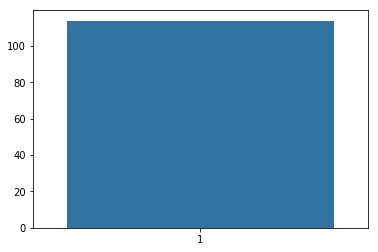

In [8]:


sns.barplot(x=np.asarray(list(group_count.keys())), y=np.asarray(list(group_count.values())))

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from collections import defaultdict
import re 
from post_process import *

pattern = r"(NVR.+?)\/"

def vis_obj_count(files, channel_file, ignore_region=False):
    info = get_channel_info(channel_file) # get info about frame size and ignore region of this channel
    
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{}'.format(int(p.get_height()))
            ax.text(_x, _y, value, ha="center") 
    
    def handler(file):
        data = []
        spliter = None
        with open(file, "rt") as f:
            for line in f:
                if(spliter is None):
                    spliter = " " if len(line.split(" ")) > 3 else ","
                line = line.strip().split(spliter)
                
                if(ignore_region):
                    if(filter_region(line, info, 'iou')):
                        continue
                        
                data.append(line)
                
        group_frames = defaultdict(int)
        for d in data:
            group_frames[int(d[0])] += 1

        group_count = defaultdict(int)
        for k, v in group_frames.items():
            group_count[v] += 1



        num_peoples = np.asarray(list(group_count.keys()))
        num_frames = np.asarray(list(group_count.values()))
    
        mean = np.sum(num_peoples * num_frames) / np.sum(num_frames)
        print("Mean: ", mean)
        
        return (num_peoples, num_frames, mean)
    
    if(not isinstance(files, list)):
        files = [files]
        
    vis_data = []
    for file in files:
        vis_data.append(handler(file))
    
    ncols = 2
    tmp = len(files) / ncols
    if(int(tmp) < tmp):
        nrows = int(tmp) + 1
    else:
        nrows = int(tmp)
    
    fig, axes = plt.subplots(nrows, ncols ,figsize=(25, nrows * 5), squeeze=False)
    for i in range(nrows):
        for j in range(ncols):
            index = i*ncols + j
            if index < len(files):
                num_peoples, num_frames, mean = vis_data[index]

                sns.barplot(x=num_peoples, y=num_frames, capsize=.2, ax=axes[i, j])

                title_name = re.findall(pattern, str(files[index]))
                if(len(title_name) == 1):
                    title_name = title_name[0]
                else:
                    title_name = str(file)

                axes[i, j].set_title(title_name + " " + "- Mean " + str(mean))
                #ax.set(xlabel='Number of humans', ylabel='Number of frames')
                #plt.figure(figsize=(30, 30))

                _show_on_single_plot(axes[i, j])
            else:
                axes[i, j].set_axis_off()
    plt.show()


Mean:  1.0


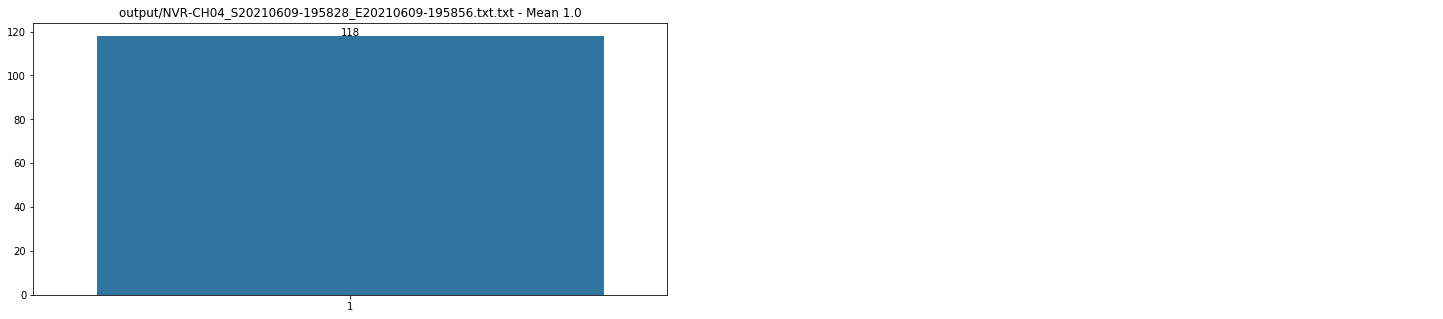

In [10]:
vis_obj_count("output/NVR-CH04_S20210609-195828_E20210609-195856.txt.txt", "static/ignore_region/CH04.json")

Mean:  1.0


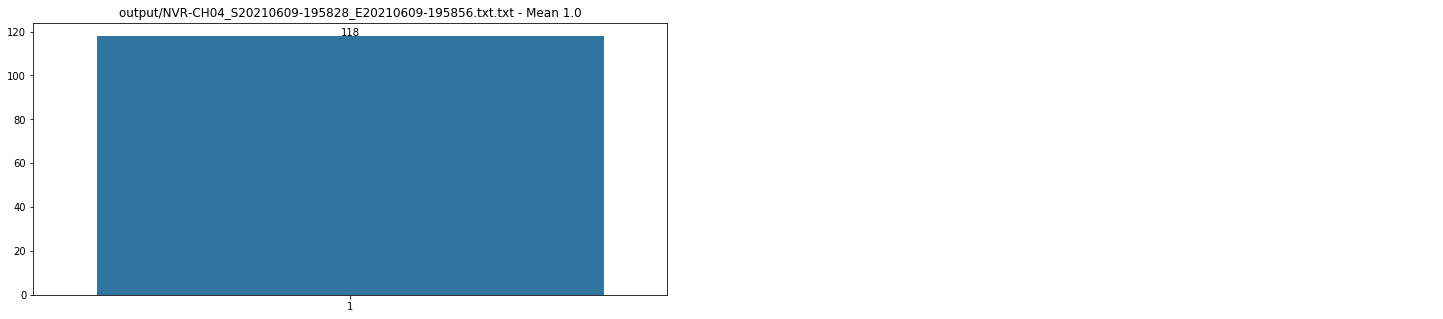

In [11]:
vis_obj_count("output/NVR-CH04_S20210609-195828_E20210609-195856.txt.txt", "static/ignore_region/CH04.json", True)

In [12]:
!ls

ch04-choosed.csv				README.md
NVR-CH04_S20210609-195828_E20210609-195856.mp4	static
output						task-count-people.ipynb
post_process


In [13]:
choosed_video = pd.read_csv('static/Choosed video.csv')
choosed_video.head()

,Name,Channel,Start_day,Start_time,End_day,End_time,Frames,CD,Filter frame,Durations
0,NVR-CH06_S20210608-173117_E20210608-173202.mp4,6,2021-08-06,17:31:17,08/06/2021,17:32:02,441,0,False,0:00:45
1,NVR-CH06_S20210609-111136_E20210609-111336.mp4,6,2021-09-06,11:11:36,09/06/2021,11:13:36,1201,0,True,0:02:00
2,NVR-CH06_S20210608-115756_E20210608-115819.mp4,6,2021-08-06,11:57:56,08/06/2021,11:58:19,201,0,False,0:00:23
3,NVR-CH06_S20210608-112822_E20210608-112924.mp4,6,2021-08-06,11:28:22,08/06/2021,11:29:24,641,0,False,0:01:02
4,NVR-CH06_S20210608-174701_E20210608-174739.mp4,6,2021-08-06,17:47:01,08/06/2021,17:47:39,361,0,False,0:00:38


In [14]:
choosed_video.shape

(92, 10)

In [15]:
videos_name = choosed_video["Name"].apply(lambda x: x.split(".")[0]).values

In [16]:
from pathlib import Path

paths = []
for path in Path('output').rglob('*.txt'):
    #if("gt" in path.name):
    v_name = str(path).split("/")[-1].split(".")[0]
    #if(v_name in videos_name):
    #    print(v_name)
    paths.append(path)
    #print(re.findall(pattern, str(path)))

In [17]:
assert len(paths) == len(videos_name)

AssertionError: 

Mean:  2.0728260869565216
Mean:  4.665909090909091
Mean:  1.8432835820895523
Mean:  1.3
Mean:  1.0
Mean:  1.2844036697247707
Mean:  1.5625
Mean:  2.596169193934557
Mean:  2.3189655172413794
Mean:  2.613888888888889


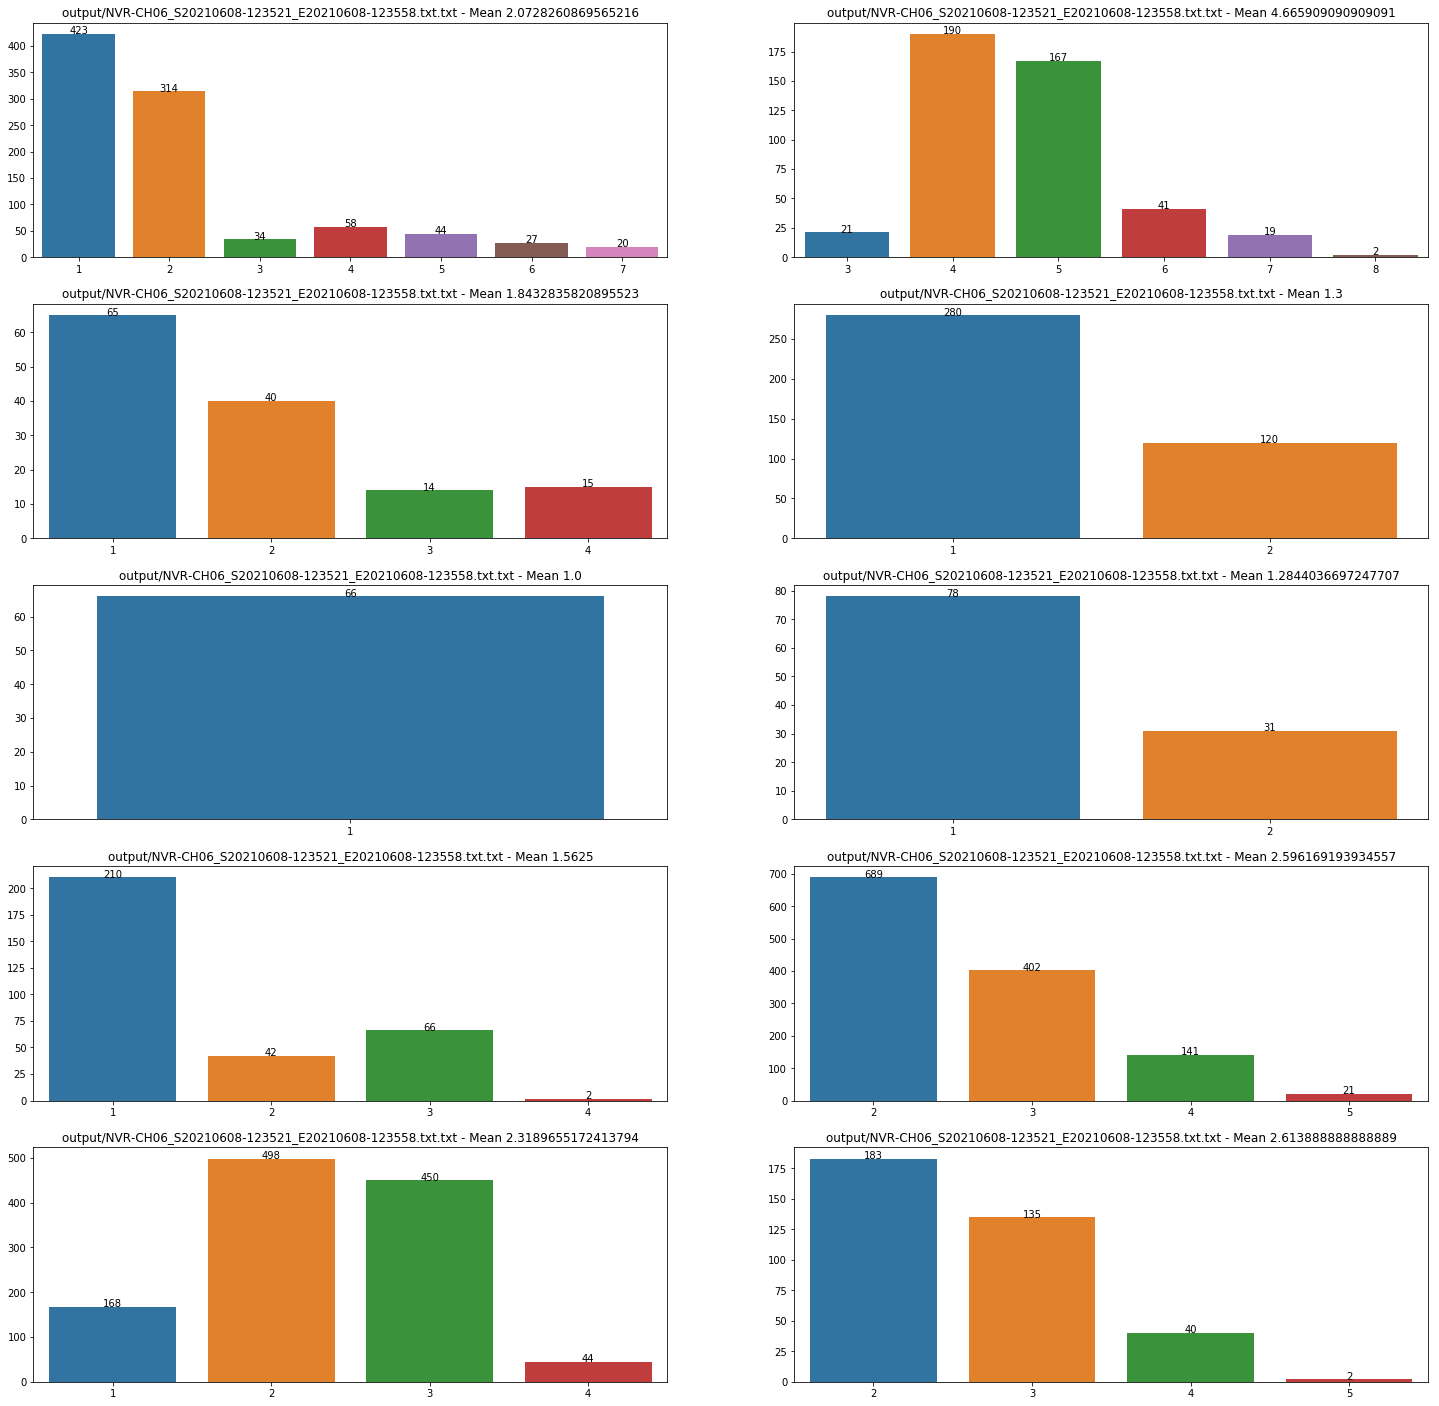

In [18]:
vis_obj_count(paths[:10],"static/ignore_region/CH06.json", False)

In [19]:
len(paths)

2494

In [20]:
ch = pd.read_csv("ch04statistic.csv")
ch.head()

FileNotFoundError: File b'ch04statistic.csv' does not exist

In [21]:
info = get_channel_info("static/ignore_region/CH04.json") # get info about frame size and ignore region of this channel

def handler(file, ignore_region = False):
        data = []
        spliter = None
        with open(file, "rt") as f:
            for line in f:
                if(spliter is None):
                    spliter = " " if len(line.split(" ")) > 3 else ","
                line = line.strip().split(spliter)
                
                if(ignore_region):
                    if(filter_region(line, info, 'iou')):
                        continue
                        
                data.append(line)
                
        group_frames = defaultdict(int)
        for d in data:
            group_frames[int(d[0])] += 1

        group_count = defaultdict(int)
        for k, v in group_frames.items():
            group_count[v] += 1
        
        tmp = []                        
        for k, v in group_count.items():
            for i in range(v):          
                tmp.append(k)           

        ar = np.asarray(tmp)            
        std = np.std(ar)
        
        num_peoples = np.asarray(list(group_count.keys()))
        num_frames = np.asarray(list(group_count.values()))
        
        mean = np.sum(num_peoples * num_frames) / np.sum(num_frames)
        
        return (num_peoples, num_frames, mean, std)

In [22]:
ch_ignore_info = []
videos = []
valid_paths = []

for path in paths:
    if("NVR-CH04" not in str(path)):
        continue
    print(path)
    valid_paths.append(path)
    name = str(path).split("/")[-1].split(".")[0] + ".mp4"
    videos.append(name)
    
    _, _, mean, std = handler(path, True)
    ch_ignore_info.append((mean, std))

output/NVR-CH04_S20210608-083155_E20210608-083225.txt.txt
output/NVR-CH04_S20210609-191912_E20210609-191935.txt.txt
output/NVR-CH04_S20210608-171727_E20210608-171752.txt.txt
output/NVR-CH04_S20210608-171332_E20210608-171405.txt.txt
output/NVR-CH04_S20210610-083951_E20210610-084025.txt.txt
output/NVR-CH04_S20210608-121718_E20210608-121741.txt.txt
output/NVR-CH04_S20210609-171110_E20210609-171141.txt.txt
output/NVR-CH04_S20210609-083348_E20210609-083609.txt.txt
output/NVR-CH04_S20210608-124704_E20210608-124749.txt.txt
output/NVR-CH04_S20210609-111431_E20210609-111551.txt.txt
output/NVR-CH04_S20210609-120842_E20210609-120920.txt.txt
output/NVR-CH04_S20210609-113723_E20210609-113907.txt.txt
output/NVR-CH04_S20210608-083658_E20210608-083735.txt.txt
output/NVR-CH04_S20210610-074323_E20210610-074358.txt.txt
output/NVR-CH04_S20210608-110808_E20210608-110837.txt.txt
output/NVR-CH04_S20210610-073742_E20210610-073830.txt.txt
output/NVR-CH04_S20210608-124511_E20210608-124535.txt.txt
output/NVR-CH0

output/NVR-CH04_S20210608-084520_E20210608-084646.txt.txt
output/NVR-CH04_S20210609-120631_E20210609-120652.txt.txt
output/NVR-CH04_S20210608-073744_E20210608-073830.txt.txt
output/NVR-CH04_S20210608-184635_E20210608-184703.txt.txt
output/NVR-CH04_S20210609-122656_E20210609-122723.txt.txt
output/NVR-CH04_S20210608-111025_E20210608-111052.txt.txt
output/NVR-CH04_S20210607-095007_E20210607-100701.txt.txt
output/NVR-CH04_S20210608-075430_E20210608-075537.txt.txt
output/NVR-CH04_S20210609-121524_E20210609-121548.txt.txt
output/NVR-CH04_S20210609-115418_E20210609-115440.txt.txt
output/NVR-CH04_S20210609-111757_E20210609-111822.txt.txt
output/NVR-CH04_S20210609-084530_E20210609-084610.txt.txt
output/NVR-CH04_S20210608-074955_E20210608-075019.txt.txt
output/NVR-CH04_S20210609-191858_E20210609-191920.txt.txt
output/NVR-CH04_S20210610-080647_E20210610-081114.txt.txt
output/NVR-CH04_S20210609-170358_E20210609-170421.txt.txt
output/NVR-CH04_S20210608-084431_E20210608-084503.txt.txt
output/NVR-CH0

output/NVR-CH04_S20210608-172303_E20210608-172338.txt.txt
output/NVR-CH04_S20210608-120732_E20210608-120812.txt.txt
output/NVR-CH04_S20210608-074125_E20210608-074148.txt.txt
output/NVR-CH04_S20210609-120700_E20210609-120739.txt.txt
output/NVR-CH04_S20210610-081149_E20210610-081211.txt.txt
output/NVR-CH04_S20210609-172758_E20210609-172915.txt.txt
output/NVR-CH04_S20210609-121551_E20210609-121624.txt.txt
output/NVR-CH04_S20210608-075113_E20210608-075142.txt.txt
output/NVR-CH04_S20210610-070443_E20210610-070507.txt.txt
output/NVR-CH04_S20210610-085119_E20210610-085259.txt.txt
output/NVR-CH04_S20210610-074959_E20210610-075028.txt.txt
output/NVR-CH04_S20210608-170629_E20210608-170703.txt.txt
output/NVR-CH04_S20210609-112523_E20210609-112544.txt.txt
output/NVR-CH04_S20210609-115217_E20210609-115321.txt.txt
output/NVR-CH04_S20210608-084454_E20210608-084517.txt.txt
output/NVR-CH04_S20210608-114506_E20210608-114555.txt.txt
output/NVR-CH04_S20210609-111947_E20210609-112010.txt.txt
output/NVR-CH0

output/NVR-CH04_S20210608-074320_E20210608-074343.txt.txt
output/NVR-CH04_S20210609-110333_E20210609-110354.txt.txt
output/NVR-CH04_S20210608-170235_E20210608-170258.txt.txt
output/NVR-CH04_S20210609-172921_E20210609-172944.txt.txt
output/NVR-CH04_S20210608-085132_E20210608-085622.txt.txt
output/NVR-CH04_S20210610-073509_E20210610-073552.txt.txt
output/NVR-CH04_S20210609-083903_E20210609-083943.txt.txt
output/NVR-CH04_S20210608-084300_E20210608-084324.txt.txt
output/NVR-CH04_S20210609-183210_E20210609-183414.txt.txt
output/NVR-CH04_S20210610-082649_E20210610-082737.txt.txt
output/NVR-CH04_S20210607-102432_E20210607-103401.txt.txt
output/NVR-CH04_S20210608-191144_E20210608-191328.txt.txt
output/NVR-CH04_S20210608-122253_E20210608-122317.txt.txt
output/NVR-CH04_S20210608-121904_E20210608-121943.txt.txt
output/NVR-CH04_S20210607-153100_E20210607-155800.txt.txt
output/NVR-CH04_S20210608-172641_E20210608-172702.txt.txt
output/NVR-CH04_S20210608-070154_E20210608-070228.txt.txt
output/NVR-CH0

output/NVR-CH04_S20210608-124902_E20210608-124937.txt.txt
output/NVR-CH04_S20210609-192148_E20210609-192231.txt.txt
output/NVR-CH04_S20210610-075341_E20210610-075430.txt.txt
output/NVR-CH04_S20210608-120256_E20210608-120323.txt.txt
output/NVR-CH04_S20210608-125548_E20210608-125612.txt.txt
output/NVR-CH04_S20210608-185751_E20210608-185800.txt.txt
output/NVR-CH04_S20210610-081703_E20210610-081823.txt.txt
output/NVR-CH04_S20210609-190429_E20210609-190513.txt.txt
output/NVR-CH04_S20210608-185251_E20210608-185344.txt.txt
output/NVR-CH04_S20210609-071324_E20210609-071347.txt.txt
output/NVR-CH04_S20210610-085758_E20210610-085828.txt.txt
output/NVR-CH04_S20210608-115531_E20210608-115716.txt.txt
output/NVR-CH04_S20210609-172046_E20210609-172129.txt.txt
output/NVR-CH04_S20210608-123739_E20210608-123808.txt.txt
output/NVR-CH04_S20210608-070419_E20210608-070448.txt.txt
output/NVR-CH04_S20210608-123809_E20210608-123908.txt.txt
output/NVR-CH04_S20210608-121215_E20210608-121242.txt.txt
output/NVR-CH0

In [23]:
assert len(ch_ignore_info) == len(videos)

In [29]:
tmp_df = pd.DataFrame({"Name": videos, "Average_people_per_frame_IGNORE": list(map(lambda x: x[0], ch_ignore_info)), "STD_people_per_frame_IGNORE":list(map(lambda x: x[1], ch_ignore_info))})
tmp_df.head()

,Name,Average_people_per_frame_IGNORE,STD_people_per_frame_IGNORE
0,NVR-CH04_S20210608-083155_E20210608-083225.mp4,1.679688,0.749308
1,NVR-CH04_S20210609-191912_E20210609-191935.mp4,1.000000,0.000000
2,NVR-CH04_S20210608-171727_E20210608-171752.mp4,1.155963,0.362821
3,NVR-CH04_S20210608-171332_E20210608-171405.mp4,3.096000,1.353065
4,NVR-CH04_S20210610-083951_E20210610-084025.mp4,1.016181,0.126172


In [31]:
ch_ignore = pd.merge(ch, tmp_df, how="inner", on="Name")

In [32]:
ch_ignore.head()

,Unnamed: 0,Name,Channel,Start_day,Start_time,End_day,End_time,Frames,Durations,Average_people_per_frame_down,STD_people_per_frame,Average_people_per_frame_IGNORE,STD_people_per_frame_IGNORE
0,456,NVR-CH04_S20210609-113009_E20210609-113658.mp4,4,2021-09-06,11:30:09,09/06/2021,11:36:58,4095,0:06:49,7.965239,4.570390,7.519275,4.557011
1,297,NVR-CH04_S20210608-173657_E20210608-180358.mp4,4,2021-08-06,17:36:57,08/06/2021,18:03:58,16209,0:27:01,7.873951,1.775281,7.659798,1.639418
2,296,NVR-CH04_S20210608-173010_E20210608-173657.mp4,4,2021-08-06,17:30:10,08/06/2021,17:36:57,4060,0:06:47,5.934467,2.197031,5.697955,2.199895
3,104,NVR-CH04_S20210608-083726_E20210608-083850.mp4,4,2021-08-06,08:37:26,08/06/2021,8:38:50,821,0:01:24,5.916413,1.394955,5.445289,1.368629
4,584,NVR-CH04_S20210609-173203_E20210609-175447.mp4,4,2021-09-06,17:32:03,09/06/2021,17:54:47,13648,0:22:44,5.831025,2.062949,5.577050,1.848769


In [34]:
columns = list(ch_ignore.columns)
columns[9] = "Average_people_per_frame"
ch_ignore.columns = columns

ch_ignore = ch_ignore[columns[1:]]
ch_ignore.head()

,Name,Channel,Start_day,Start_time,End_day,End_time,Frames,Durations,Average_people_per_frame,STD_people_per_frame,Average_people_per_frame_IGNORE,STD_people_per_frame_IGNORE
0,NVR-CH04_S20210609-113009_E20210609-113658.mp4,4,2021-09-06,11:30:09,09/06/2021,11:36:58,4095,0:06:49,7.965239,4.570390,7.519275,4.557011
1,NVR-CH04_S20210608-173657_E20210608-180358.mp4,4,2021-08-06,17:36:57,08/06/2021,18:03:58,16209,0:27:01,7.873951,1.775281,7.659798,1.639418
2,NVR-CH04_S20210608-173010_E20210608-173657.mp4,4,2021-08-06,17:30:10,08/06/2021,17:36:57,4060,0:06:47,5.934467,2.197031,5.697955,2.199895
3,NVR-CH04_S20210608-083726_E20210608-083850.mp4,4,2021-08-06,08:37:26,08/06/2021,8:38:50,821,0:01:24,5.916413,1.394955,5.445289,1.368629
4,NVR-CH04_S20210609-173203_E20210609-175447.mp4,4,2021-09-06,17:32:03,09/06/2021,17:54:47,13648,0:22:44,5.831025,2.062949,5.577050,1.848769


In [36]:
ch_ignore.sort_values(by="Average_people_per_frame_IGNORE", ascending=False, inplace=True)

In [38]:
ch_ignore.describe()

,Channel,Frames,Average_people_per_frame,STD_people_per_frame,Average_people_per_frame_IGNORE,STD_people_per_frame_IGNORE
count,701.0,701.000000,701.000000,701.000000,701.000000,701.000000
mean,4.0,1164.633381,1.832766,0.608704,1.596510,0.472195
std,0.0,3048.122542,1.003838,0.572493,0.883782,0.518427
min,4.0,22.000000,1.000000,0.000000,1.000000,0.000000
25%,4.0,241.000000,1.016667,0.121552,1.000000,0.000000
50%,4.0,321.000000,1.528767,0.497182,1.252336,0.412372
75%,4.0,541.000000,2.253579,0.880524,1.839286,0.713429
max,4.0,16224.000000,7.965239,4.570390,7.659798,4.557011


In [39]:
ch_ignore.to_csv("ch04_ignore.csv", index=False)

In [23]:
choosed_video = pd.read_csv("ch04-choosed.csv")

In [25]:
videos_name = choosed_video["Name"].apply(lambda x: x.split(".")[0]).values
npath = []
for path in valid_paths:
    v_name = str(path).split("/")[-1].split(".")[0]
    if(v_name in videos_name):
        print(v_name)
        npath.append(path)

NVR-CH04_S20210609-173203_E20210609-175447
NVR-CH04_S20210608-180358_E20210608-182039
NVR-CH04_S20210609-175447_E20210609-182146
NVR-CH04_S20210608-083726_E20210608-083850
NVR-CH04_S20210609-113009_E20210609-113658
NVR-CH04_S20210609-182146_E20210609-182401
NVR-CH04_S20210608-173010_E20210608-173657
NVR-CH04_S20210608-173657_E20210608-180358


In [26]:
def vis_obj_count_merge(files, channel_file, ignore_region=False):
    info = get_channel_info(channel_file) # get info about frame size and ignore region of this channel
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{}'.format(int(p.get_height()))
            ax.text(_x, _y, value, ha="center") 
    
    def handler(file):
        data = []
        spliter = None
        with open(file, "rt") as f:
            for line in f:
                if(spliter is None):
                    spliter = " " if len(line.split(" ")) > 3 else ","
                line = line.strip().split(spliter)
                
                if(ignore_region):
                    if(filter_region(line, info, 'iou')):
                        continue
                        
                data.append(line)

        group_frames = defaultdict(int)
        for d in data:
            group_frames[int(d[0])] += 1

        group_count = defaultdict(int)
        for k, v in group_frames.items():
            group_count[v] += 1
        
        return group_count
    
    if(not isinstance(files, list)):
        files = [files]
        
    vis_data = []
    for file in files:
        vis_data.append(handler(file))
    
    merge_dict = {}
    for d in vis_data:
        for k, v in d.items():
            if k not in merge_dict:
                merge_dict[k] = v
            else:
                merge_dict[k] += v
    
    
    num_peoples = np.asarray(list(merge_dict.keys()))
    num_frames = np.asarray(list(merge_dict.values()))
    
    plt.figure(figsize=(15, 10))
    ax = sns.barplot(x=num_peoples, y=num_frames)
    _show_on_single_plot(ax)

    plt.show()

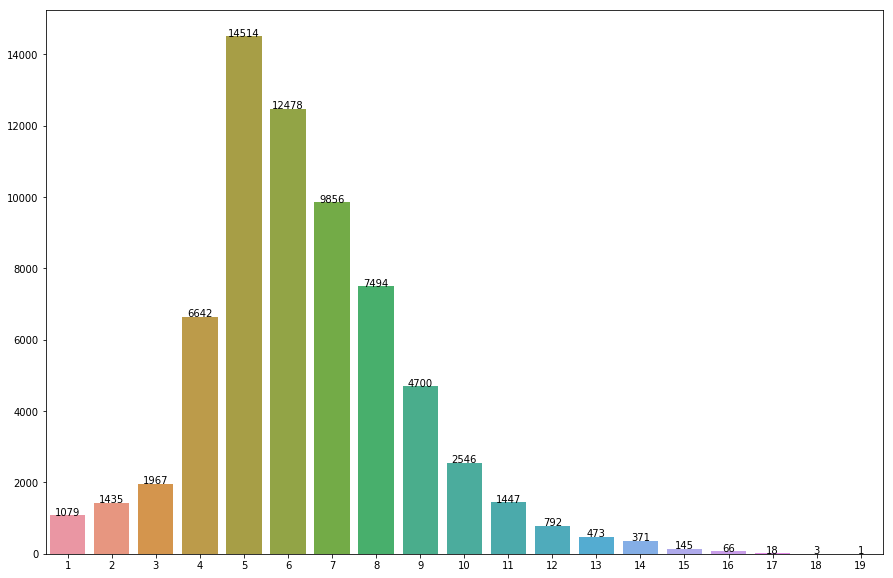

In [27]:
vis_obj_count_merge(npath, "static/ignore_region/CH04.json", False)

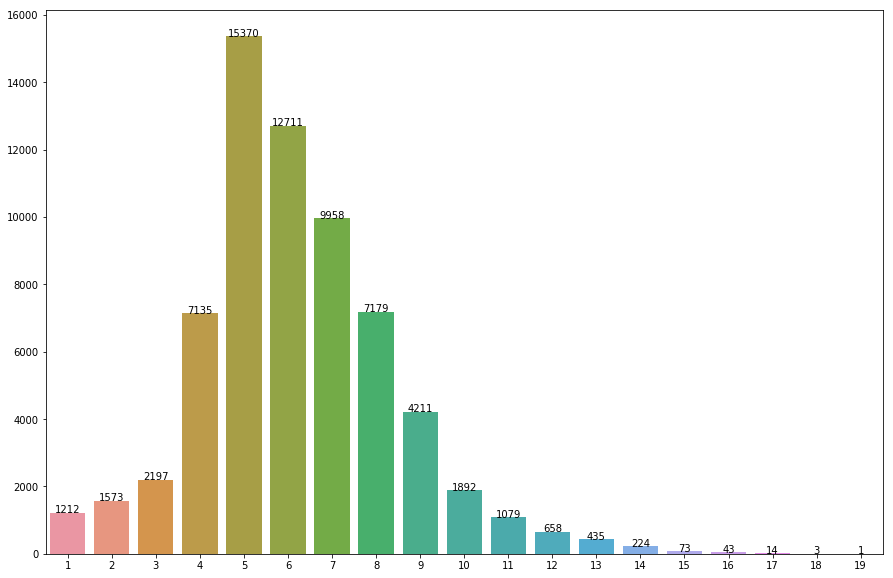

In [28]:
vis_obj_count_merge(npath, "static/ignore_region/CH04.json", True)